In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #28x28 0-9 hand written-digits

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2679 - accuracy: 0.9209
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1113 - accuracy: 0.9658
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0760 - accuracy: 0.9758


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 947us/step - loss: 0.1008 - accuracy: 0.9688
0.10077685117721558 0.9688000082969666


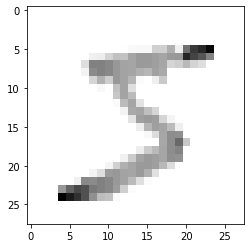

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
#print(x_train[0])

In [17]:
model.save('CNN1')

INFO:tensorflow:Assets written to: CNN1/assets


INFO:tensorflow:Assets written to: CNN1/assets


In [18]:
new_model = tf.keras.models.load_model('CNN1')

In [22]:
predictions = new_model.predict(x_test)

In [23]:
print(predictions)

[[1.6745248e-10 4.6663313e-09 4.6795785e-06 ... 9.9998963e-01
  1.7981572e-08 5.3806093e-07]
 [3.0801217e-10 8.6764987e-05 9.9991310e-01 ... 8.4507884e-10
  2.4238599e-08 5.3071751e-13]
 [1.6771847e-07 9.9932098e-01 1.8484493e-04 ... 9.7504300e-05
  3.6368929e-04 7.4183436e-07]
 ...
 [1.1078776e-10 6.0236303e-08 5.9169527e-09 ... 9.9054087e-06
  2.2494532e-05 3.5860718e-04]
 [1.2287900e-06 2.4747997e-06 7.6345277e-05 ... 1.9930239e-05
  5.7431042e-02 2.6625221e-08]
 [2.0573456e-08 9.9201936e-09 3.0983451e-06 ... 3.4152398e-10
  1.1240050e-07 3.5962000e-10]]


In [24]:
import numpy as np

print(np.argmax(predictions[0]))​

7


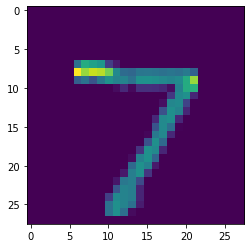

In [25]:
plt.imshow(x_test[0])
plt.show()